<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libs and Load Data set

In [ ]:
! pip install scikit-learn
! pip install Pandas
! pip install folium

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Hierarchical clustering

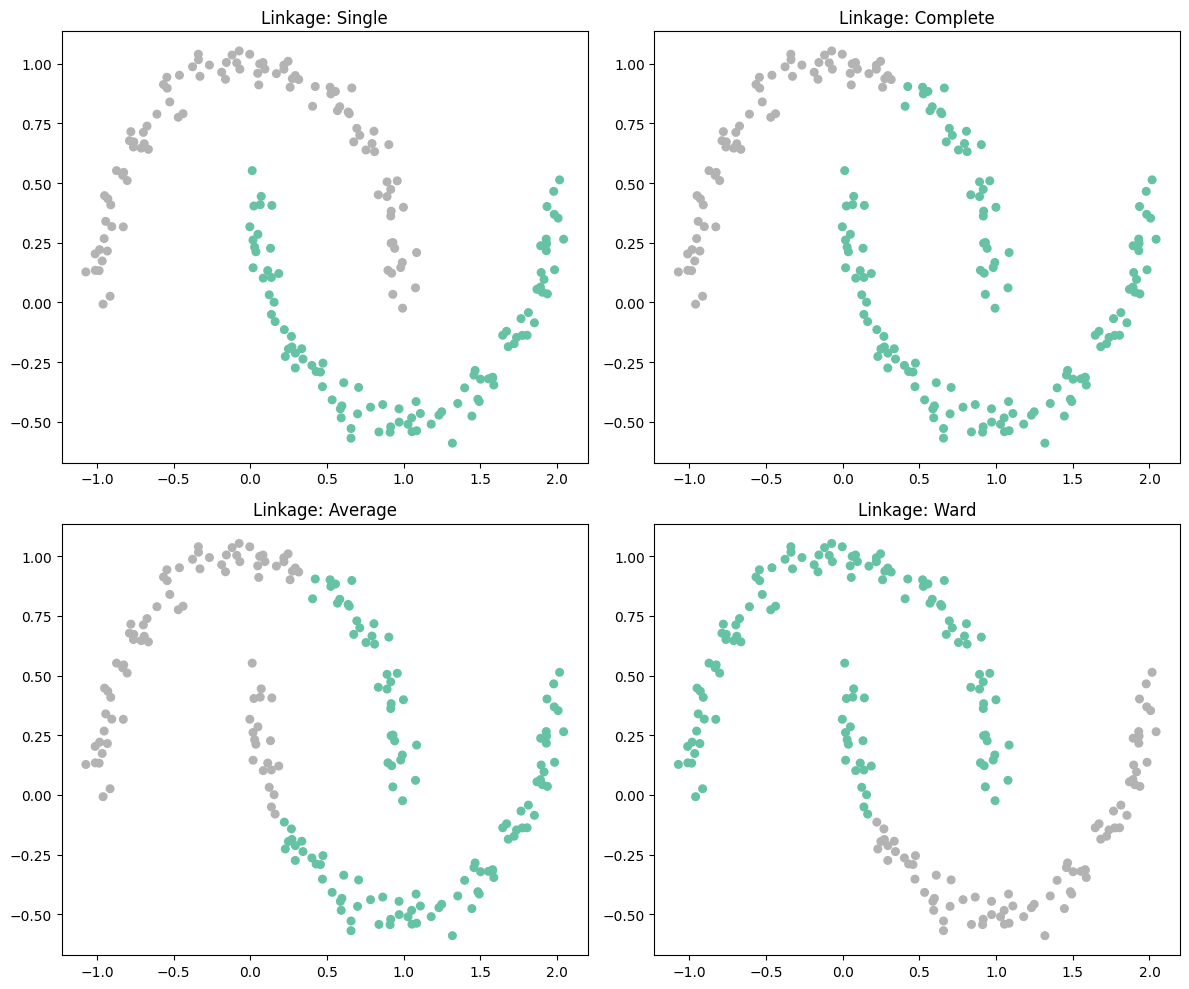

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering

X, _ = make_moons(n_samples=200, noise=0.05)

linkage_methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    if method == 'ward':
        model = AgglomerativeClustering(n_clusters=2, linkage=method)
    else:
        model = AgglomerativeClustering(n_clusters=2, linkage=method, metric='euclidean')

    labels = model.fit_predict(X)
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=30)
    axes[i].set_title(f'Linkage: {method.capitalize()}')

plt.tight_layout()
plt.show()

# DBSCAN Clustering

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/earthquake_data.csv')
df.head(10)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,green,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.3810,the Fiji Islands,NaN,NaN
6,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,green,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.3630,the Fiji Islands,NaN,NaN
7,"M 6.7 - 60 km SSW of Boca Chica, Panama",6.7,20-10-2022 11:57,7,6,green,1,797,us,145,1.151,37.0,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",NaN,Panama
8,"M 6.8 - 55 km SSW of Aguililla, Mexico",6.8,22-09-2022 06:16,8,7,yellow,1,1179,us,175,2.137,92.0,mww,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico
9,"M 7.6 - 35 km SSW of Aguililla, Mexico",7.6,19-09-2022 18:05,9,8,yellow,1,1799,us,271,1.153,69.0,mww,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico


In [ ]:
# Inspect data structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [ ]:
print(df.describe())

        magnitude         cdi         mmi     tsunami          sig  \
count  782.000000  782.000000  782.000000  782.000000   782.000000   
mean     6.941125    4.333760    5.964194    0.388747   870.108696   
std      0.445514    3.169939    1.462724    0.487778   322.465367   
min      6.500000    0.000000    1.000000    0.000000   650.000000   
25%      6.600000    0.000000    5.000000    0.000000   691.000000   
50%      6.800000    5.000000    6.000000    0.000000   754.000000   
75%      7.100000    7.000000    7.000000    1.000000   909.750000   
max      9.100000    9.000000    9.000000    1.000000  2910.000000   

              nst        dmin         gap       depth    latitude   longitude  
count  782.000000  782.000000  782.000000  782.000000  782.000000  782.000000  
mean   230.250639    1.325757   25.038990   75.883199    3.538100   52.609199  
std    250.188177    2.218805   24.225067  137.277078   27.303429  117.898886  
min      0.000000    0.000000    0.000000    2.70

In [ ]:
import folium
from folium import plugins
print("Earthquakes Across the World  -  Heat Map")
world = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=2)
heat_map = df[["latitude", "longitude"]].values
world.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=13))
world

Earthquakes Across the World  -  Heat Map


In [ ]:
df['alert']
alerts = df['alert'].unique()
alerts
mode_value = df['alert'].mode()[0]
df['alert'].fillna(mode_value, inplace=True)
df
# label encode alert column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['alert'] = le.fit_transform(df['alert'])
df.head(10)

<ipython-input-105-2179121774>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,0,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,0,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,0,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,0,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,0,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,0,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.3810,the Fiji Islands,NaN,NaN
6,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,0,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.3630,the Fiji Islands,NaN,NaN
7,"M 6.7 - 60 km SSW of Boca Chica, Panama",6.7,20-10-2022 11:57,7,6,0,1,797,us,145,1.151,37.0,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",NaN,Panama
8,"M 6.8 - 55 km SSW of Aguililla, Mexico",6.8,22-09-2022 06:16,8,7,3,1,1179,us,175,2.137,92.0,mww,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico
9,"M 7.6 - 35 km SSW of Aguililla, Mexico",7.6,19-09-2022 18:05,9,8,3,1,1799,us,271,1.153,69.0,mww,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

selected_features = ['latitude', 'longitude', 'magnitude', 'depth']
data = df[selected_features].dropna()

X = data[selected_features]
X_scaled = StandardScaler().fit_transform(X)

#dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head(10)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,Cluster
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,0,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands,0
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,0,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",NaN,NaN,0
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,0,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji,1
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,0,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",NaN,NaN,6
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,0,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN,-1
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,0,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.3810,the Fiji Islands,NaN,NaN,-1
6,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,0,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.3630,the Fiji Islands,NaN,NaN,-1
7,"M 6.7 - 60 km SSW of Boca Chica, Panama",6.7,20-10-2022 11:57,7,6,0,1,797,us,145,1.151,37.0,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",NaN,Panama,2
8,"M 6.8 - 55 km SSW of Aguililla, Mexico",6.8,22-09-2022 06:16,8,7,3,1,1179,us,175,2.137,92.0,mww,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico,2
9,"M 7.6 - 35 km SSW of Aguililla, Mexico",7.6,19-09-2022 18:05,9,8,3,1,1799,us,271,1.153,69.0,mww,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico,2


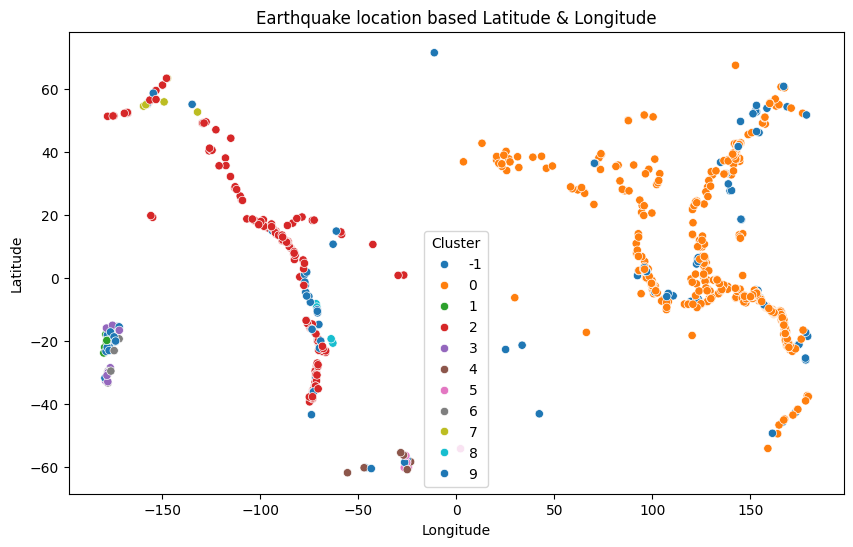

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Cluster', palette='tab10')
plt.title('Earthquake location based Latitude & Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [ ]:
X_scaled

array([[-0.48869077,  0.90802616,  0.13223459, -0.45107898],
       [-0.31129555,  0.40848226, -0.0923689 , -0.37089779],
       [-0.86450668, -1.96017977,  0.13223459,  3.6673187 ],
       ...,
       [-0.67676181,  0.97230876,  0.35683808,  0.19765977],
       [ 0.11335131,  0.6305178 , -0.31697239, -0.31258419],
       [ 0.12313656,  0.62780187,  1.25525204, -0.31258419]])

In [ ]:
np.max(X_scaled)

np.float64(4.848907880472212)

In [ ]:
len(X_scaled)

782

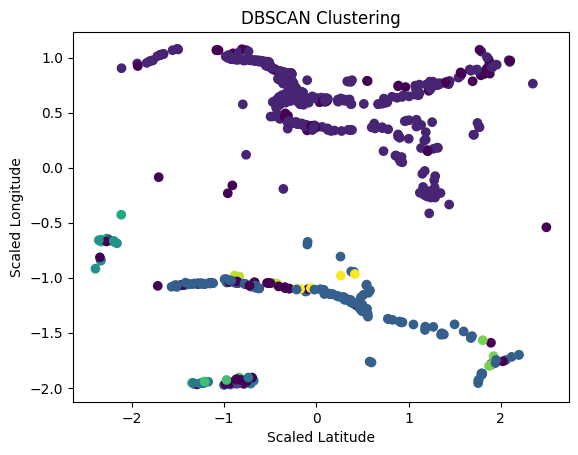

In [ ]:
plt.scatter( X_scaled[:,0], X_scaled[:,1], c=clusters)
plt.xlabel('Scaled Latitude')
plt.ylabel('Scaled Longitude')
plt.title('DBSCAN Clustering')
plt.show()

# Dimension Reduction - PCA

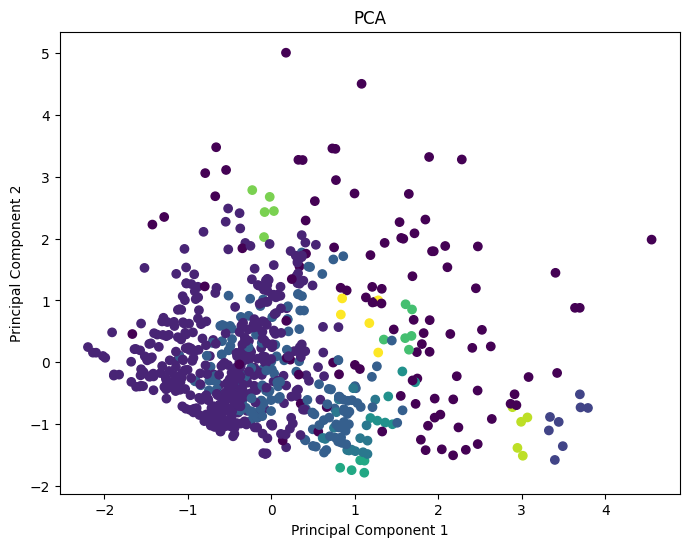

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X = df[['latitude', 'longitude', 'magnitude', 'depth']]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['Cluster'], cmap='viridis') # Single datapoits are separated in First Principal components (PC1) and the Second Principal components (PC2).
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()




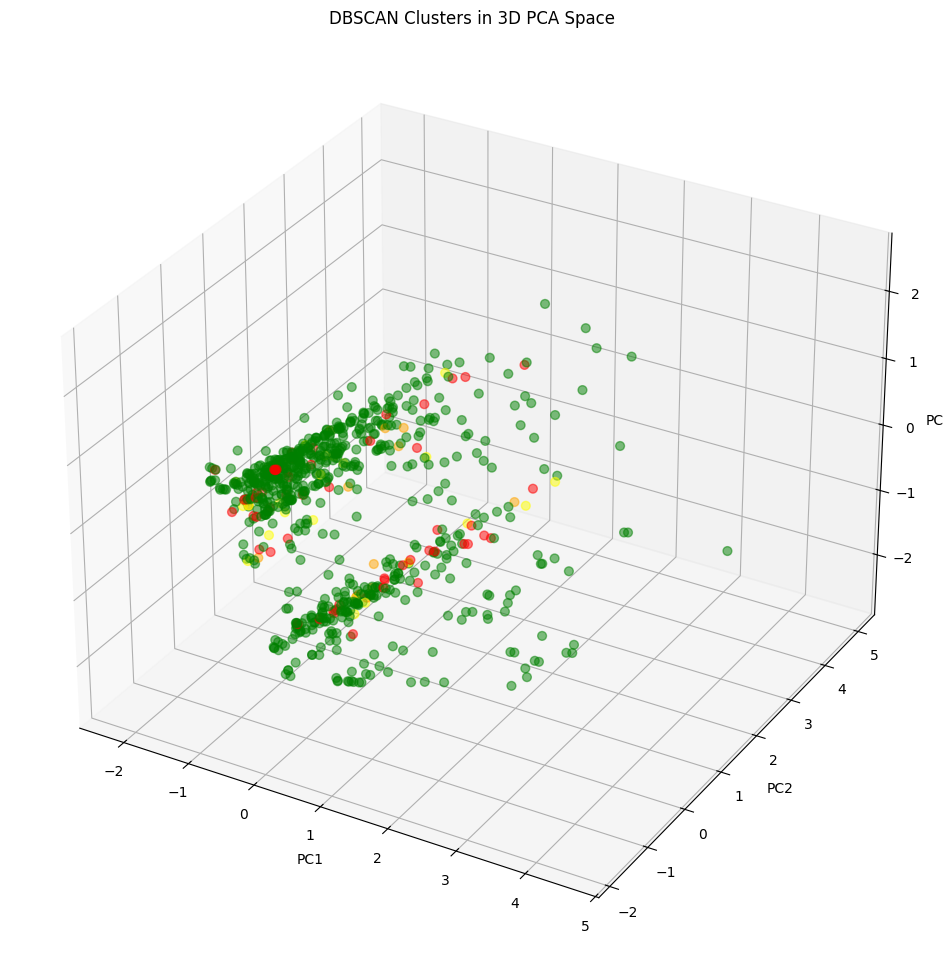

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
color_map = {
    0:'green',
    1:'yellow',
    2:'orange',
    3:'red',

}
colors = df['alert'].map(color_map)

# Plot: label -1 is noise

scatter = ax.scatter(
    X_reduced[:, 0],X_reduced[:, 1],X_reduced[:, 2],
    c=colors, s=40, alpha=0.5
)

ax.set_title("DBSCAN Clusters in 3D PCA Space")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


plt.show()


## Explained Variance Ratio

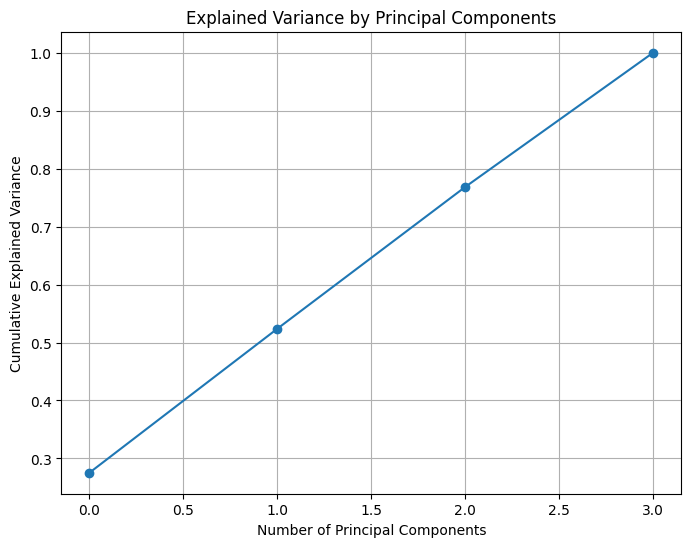

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Fit PCA on the scaled data
pca_full = PCA().fit(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='-') #cumsum is cummulative percentage
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# K-Means Clustering on PCA-Reduced

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_reduced)

KMeans(n_clusters=5, random_state=42)

In [ ]:

cluster_labels = kmeans.labels_
inertia = kmeans.inertia_
print("K-Means Inertia:", inertia)



K-Means Inertia: 851.9100786968786


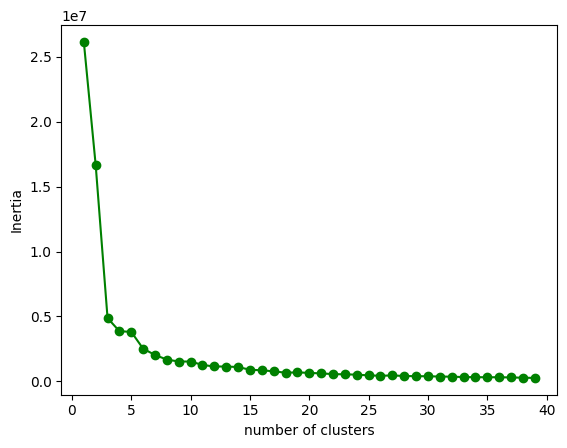

In [ ]:
inertia_list = []

# make a list which we add the caluculation of inertial in each loop to this list
for k in np.arange(1,40): # the structure of loop should be consistent and the next lines should be after for .
    kmn =KMeans(n_clusters = k)
    kmn.fit(data)
    inertia_list.append(kmn.inertia_)

plt.plot(np.arange(1,40),inertia_list,'o-',c='green')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

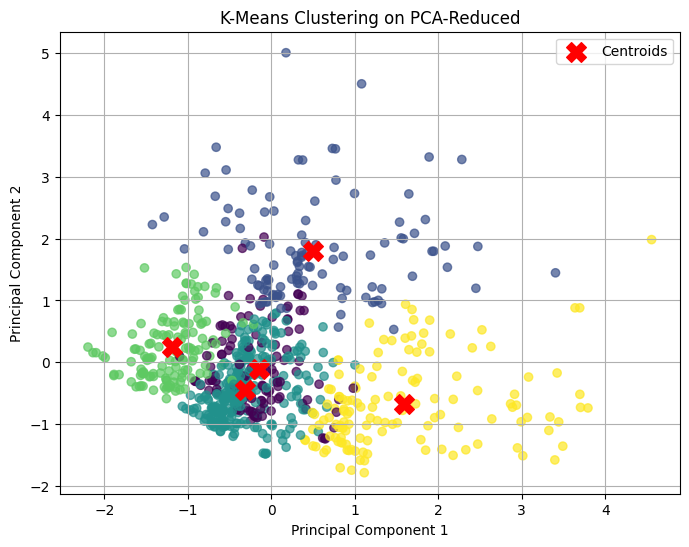

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Mean-Shift Clustering

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)
# Fit Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_labels = ms.fit_predict(X_scaled)
ms_labels


array([0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0,

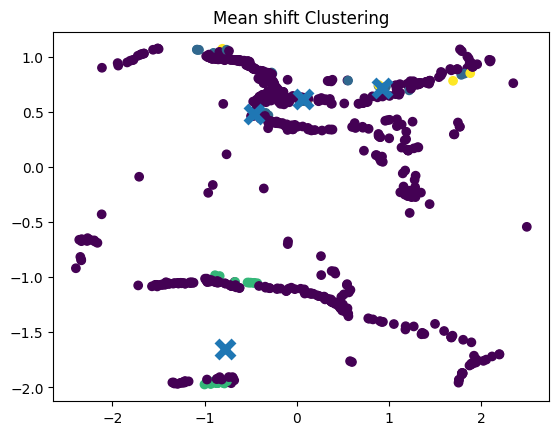

In [ ]:
cluster_center = ms.cluster_centers_
cluster_center
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=ms_labels)

plt.title('Mean shift Clustering')
plt.scatter(cluster_center[:,0], cluster_center[:,1], marker='x', s=150, linewidth=5, zorder=10)
plt.show()

In [ ]:
# Number of clusters
n_clusters_ms = len(np.unique(ms_labels))
print("Mean Shift clusters:", n_clusters_ms)

n_clusters_db = len(np.unique(df['Cluster']))
print("DB clusters:", n_clusters_ms)

Mean Shift clusters: 4
DB clusters: 4
